# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [12]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
import scipy.stats as st
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [13]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 609


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [14]:
# Set the API base URL
url = 'https://api.openweathermap.org/data/2.5/weather'

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = (f'{url}?q={city}&appid={weather_api_key}')
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url)
        data=json.loads(city_weather.text)

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = data["coord"]['lat']
        city_lng = data["coord"]['lon']
        city_max_temp = data["main"]['temp_max']
        city_humidity = data["main"]['humidity']
        city_clouds = data["clouds"]['all']
        city_wind = data["wind"]['speed']
        city_country = data["sys"]['country']
        city_date = data["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | la paz
Processing Record 2 of Set 1 | hobart
Processing Record 3 of Set 1 | ellisras
Processing Record 4 of Set 1 | tuktoyaktuk
Processing Record 5 of Set 1 | castro
Processing Record 6 of Set 1 | broome
Processing Record 7 of Set 1 | christchurch
Processing Record 8 of Set 1 | sentyabrskiy
City not found. Skipping...
Processing Record 9 of Set 1 | mahebourg
Processing Record 10 of Set 1 | rikitea
Processing Record 11 of Set 1 | ugoofaaru
Processing Record 12 of Set 1 | grand river south east
City not found. Skipping...
Processing Record 13 of Set 1 | puerto ayora
Processing Record 14 of Set 1 | amderma
City not found. Skipping...
Processing Record 15 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 16 of Set 1 | victoria
Processing Record 17 of Set 1 | kalmunai
Processing Record 18 of Set 1 | attawapiskat
City not found. Skipping...
Processing Record 19 of Set 1 | severo

In [15]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          561
Lat           561
Lng           561
Max Temp      561
Humidity      561
Cloudiness    561
Wind Speed    561
Country       561
Date          561
dtype: int64

In [16]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,la paz,-16.5000,-68.1500,292.14,17,75,4.63,BO,1681329675
1,hobart,-42.8794,147.3294,286.07,96,100,0.00,AU,1681329426
2,ellisras,-23.6649,27.7443,291.35,58,35,1.57,ZA,1681329676
3,tuktoyaktuk,69.4541,-133.0374,252.15,71,40,7.72,CA,1681329676
4,castro,-24.7911,-50.0119,294.04,74,95,1.31,BR,1681329677


In [17]:
city_data_df['Max Temp']=city_data_df["Max Temp"]/10

In [18]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [19]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,la paz,-16.5000,-68.1500,29.214,17,75,4.63,BO,1681329675
1,hobart,-42.8794,147.3294,28.607,96,100,0.00,AU,1681329426
2,ellisras,-23.6649,27.7443,29.135,58,35,1.57,ZA,1681329676
3,tuktoyaktuk,69.4541,-133.0374,25.215,71,40,7.72,CA,1681329676
4,castro,-24.7911,-50.0119,29.404,74,95,1.31,BR,1681329677


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

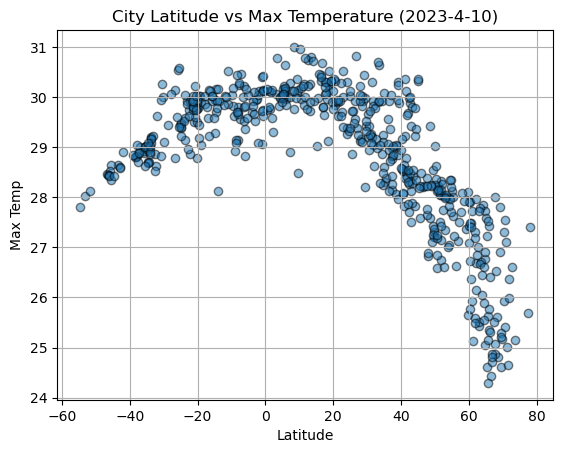

In [20]:
# Build scatter plot for latitude vs. temperature
fig, ax = plt.subplots()

data_x = city_data_df.groupby('City').mean()['Lat']
data_y = city_data_df.groupby('City').mean()['Max Temp']

# Incorporate the other graph properties
for color in ['tab:blue']:
    ax.scatter(data_x, data_y, c=color, label="Set 1",
               alpha=0.5, edgecolors='black')
    
ax.set_xlabel("Latitude")
ax.set_ylabel("Max Temp")
ax.set_title("City Latitude vs Max Temperature (2023-4-10)")
ax.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

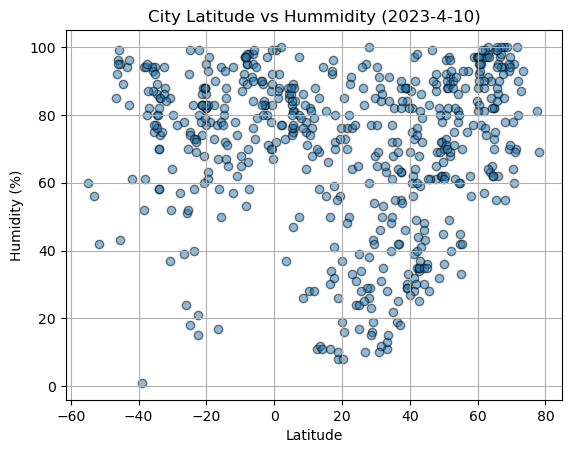

In [21]:
# Build the scatter plots for latitude vs. humidity
fig, ax = plt.subplots()

data_a = city_data_df.groupby('City').mean()['Lat']
data_b = city_data_df.groupby('City').mean()['Humidity']

# Incorporate the other graph properties
for color in ['tab:blue']:
    ax.scatter(data_a, data_b, c=color, label="Set 1",
               alpha=0.5, edgecolors='black')
    
ax.set_xlabel("Latitude")
ax.set_ylabel("Humidity (%)")
ax.set_title("City Latitude vs Hummidity (2023-4-10)")
ax.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

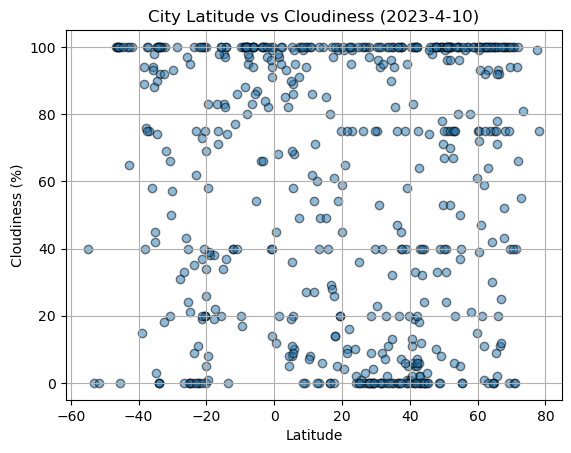

In [22]:
# Build the scatter plots for latitude vs. cloudiness
fig, ax = plt.subplots()

data_c = city_data_df.groupby('City').mean()['Lat']
data_d = city_data_df.groupby('City').mean()['Cloudiness']

# Incorporate the other graph properties
for color in ['tab:blue']:
    ax.scatter(data_c, data_d, c=color, label="Set 1",
               alpha=0.5, edgecolors='black')
    
ax.set_xlabel("Latitude")
ax.set_ylabel("Cloudiness (%)")
ax.set_title("City Latitude vs Cloudiness (2023-4-10)")
ax.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

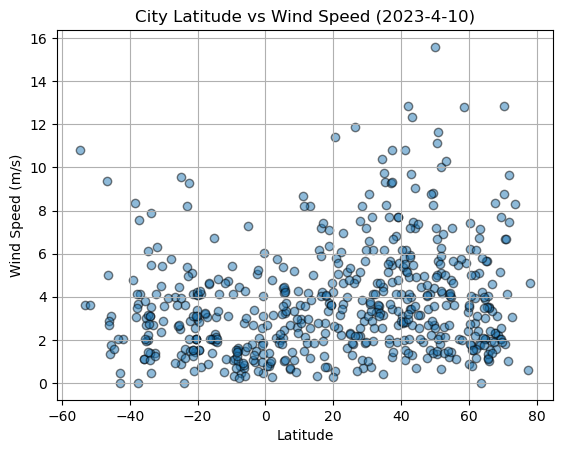

In [23]:
# Build the scatter plots for latitude vs. wind speed
fig, ax = plt.subplots()

data_e = city_data_df.groupby('City').mean()['Lat']
data_f = city_data_df.groupby('City').mean()['Wind Speed']

# Incorporate the other graph properties
for color in ['tab:blue']:
    ax.scatter(data_e, data_f, c=color, label="Set 1",
               alpha=0.5, edgecolors='black')
    
ax.set_xlabel("Latitude")
ax.set_ylabel("Wind Speed (m/s)")
ax.set_title("City Latitude vs Wind Speed (2023-4-10)")
ax.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [24]:
# Define a function to create Linear Regression plots

def linear_reg(x,y,data_f):

    fig, ax = plt.subplots()

    data_x = data_f.groupby('City').mean()[x]
    data_y = data_f.groupby('City').mean()[y]

# Incorporate the other graph properties
    for color in ['tab:blue']:
         ax.scatter(data_x, data_y, c=color, label="Set 1",
               alpha=0.5, edgecolors='black')
    
    # Fit a linear trendline to the data
    z = np.polyfit(data_x, data_y, 1)
    p = np.poly1d(z)
    ax.plot(data_x, p(data_x), c="red", linewidth=2)

    # Add the y=mx+b equation to the plot
    equation = f"y = {z[0]:.2f}x + {z[1]:.2f}"
    ax.text(0.05, 0.95, equation, transform=ax.transAxes, fontsize=12,
            verticalalignment='top', bbox=dict(facecolor='white', edgecolor='black', alpha=0.8))

    ax.set_xlabel(x)
    ax.set_ylabel(y)
    ax.grid(True)

    r_value = st.pearsonr(data_y, data_x)
    print(f'the R Value is {round(r_value[0],2)}')

# Show plot
plt.show()

In [25]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df=city_data_df[city_data_df['Lat']>=0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,tuktoyaktuk,69.4541,-133.0374,25.215,71,40,7.72,CA,1681329676
5,broome,42.2506,-75.8330,29.976,35,5,4.92,US,1681329677
9,ugoofaaru,5.6667,73.0000,30.179,77,9,4.21,MV,1681329678
11,victoria,22.2855,114.1577,29.618,89,100,2.24,HK,1681329548
12,kalmunai,7.4167,81.8167,30.004,80,91,0.70,LK,1681329682


In [26]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df=city_data_df[city_data_df['Lat']<0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,la paz,-16.5000,-68.1500,29.214,17,75,4.63,BO,1681329675
1,hobart,-42.8794,147.3294,28.607,96,100,0.00,AU,1681329426
2,ellisras,-23.6649,27.7443,29.135,58,35,1.57,ZA,1681329676
4,castro,-24.7911,-50.0119,29.404,74,95,1.31,BR,1681329677
6,christchurch,-43.5333,172.6333,28.643,94,100,2.06,NZ,1681329551


###  Temperature vs. Latitude Linear Regression Plot

the R Value is -0.85


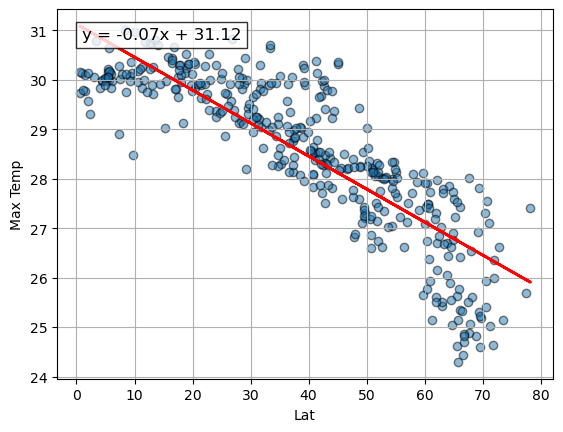

In [27]:
# Linear regression on Northern Hemisphere
# Build scatter plot for latitude vs. temperature
linear_reg("Lat","Max Temp",northern_hemi_df)

the R Value is 0.7


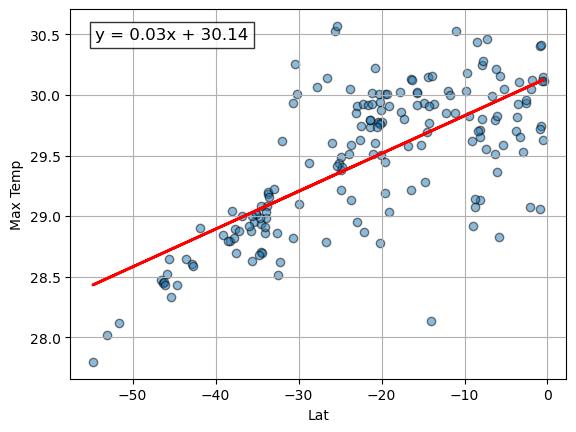

In [28]:
# Linear regression on Southern Hemisphere
linear_reg("Lat","Max Temp",southern_hemi_df)

**Discussion about the linear relationship:** There is a strong correlation between temperature and latitude in both the Northern and Southern Hemispheres. In the North, this correlation is negative, while in the South, it is positive. The Northern Hemisphere shows a slightly stronger R-value, which may be due to various factors such as the relatively smaller landmass in the South, seasonal variations, or other unrelated factors specific to this particular sample.

To confirm whether these observations are specific to this dataset or persistent over time, further samples should be collected over time.

### Humidity vs. Latitude Linear Regression Plot

the R Value is 0.25


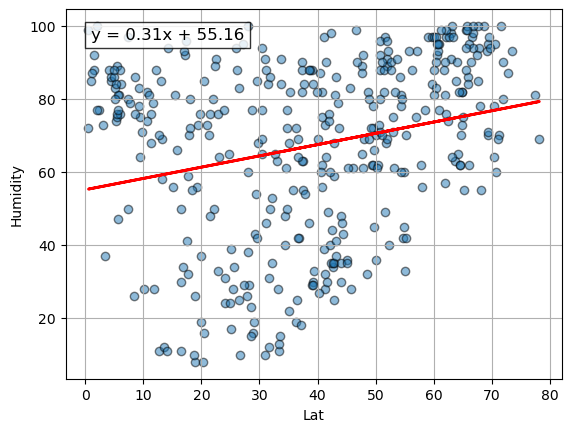

In [29]:
# Northern Hemisphere
linear_reg("Lat","Humidity",northern_hemi_df)

the R Value is 0.14


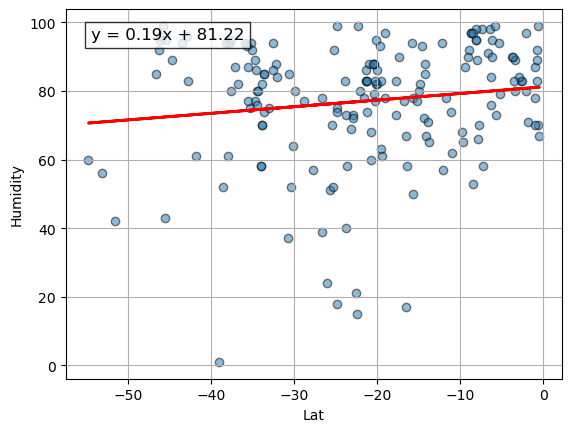

In [30]:
# Southern Hemisphere
linear_reg("Lat","Humidity",southern_hemi_df)

**Discussion about the linear relationship:** There seems to be a relatively weak relationship between Humidity and Latitude in both hemispheres. As anticipated, Humidity increases as one approaches the equator from the south, but it appears counterintuitive that it would continue to increase as Latitude increases in the North, which is inverse to what we might expect. It could be this particular sample set, and/or just seaonal fluctions. Further analysis is necessary to determine the underlying reasons for this trend.

### Cloudiness vs. Latitude Linear Regression Plot

the R Value is 0.13


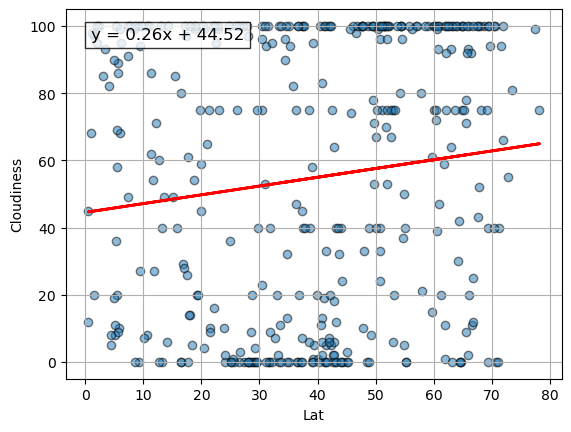

In [31]:
# Northern Hemisphere
linear_reg("Lat","Cloudiness",northern_hemi_df)

the R Value is 0.15


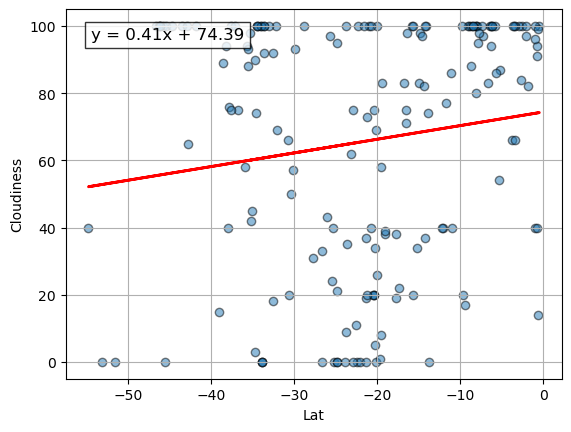

In [32]:
# Southern Hemisphere
linear_reg("Lat","Cloudiness",southern_hemi_df)

**Discussion about the linear relationship:** There appears to be very little correlation between Latitude and Cloudiness.

### Wind Speed vs. Latitude Linear Regression Plot

the R Value is 0.1


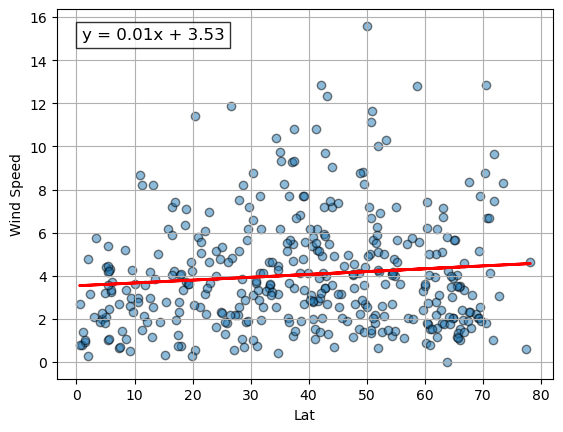

In [33]:
# Northern Hemisphere
linear_reg("Lat","Wind Speed",northern_hemi_df)

the R Value is -0.24


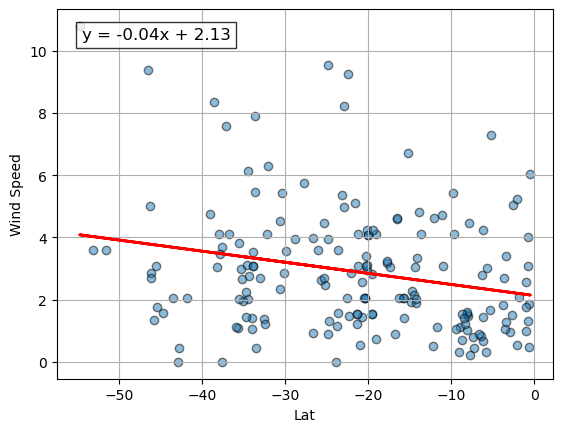

In [34]:
# Southern Hemisphere
linear_reg("Lat","Wind Speed",southern_hemi_df)

**Discussion about the linear relationship:** There is no observable relationship between Wind Speed and Latitude in the North, and a slight negative correlation in the South.